## Classification

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Churn_Modelling.csv')

In [8]:
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6594,6595,15808544,Cameron,747,France,Female,40,3,0.00,1,0,0,57817.84,1
6513,6514,15609254,Fernandez,513,Spain,Female,41,9,107135.04,2,1,1,160546.58,0
4491,4492,15726832,Donnelly,850,Germany,Male,61,3,141784.02,1,1,1,92053.75,0
3732,3733,15689598,Dean,722,France,Male,46,6,0.00,1,1,1,93917.68,1
1256,1257,15781989,Drake-Brockman,733,France,Male,42,9,120094.93,1,1,0,184056.45,0
73,74,15779052,Ballard,604,Germany,Female,25,5,157780.84,2,1,1,58426.81,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


[Text(0.5, 1.0, 'Distribution Of Variables'), Text(0, 0.5, 'Values')]

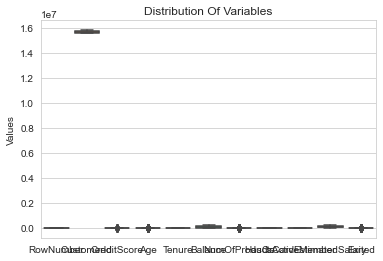

In [12]:
sns.set_style("whitegrid")

sns.boxplot(data = df).set(title = 'Distribution Of Variables' , ylabel = 'Values') 

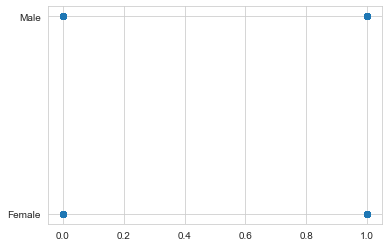

In [13]:
plt.scatter(df.Exited,df.Gender)

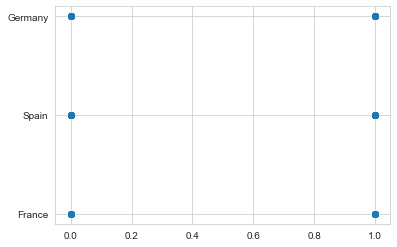

In [14]:
plt.scatter(df.Exited,df.Geography)

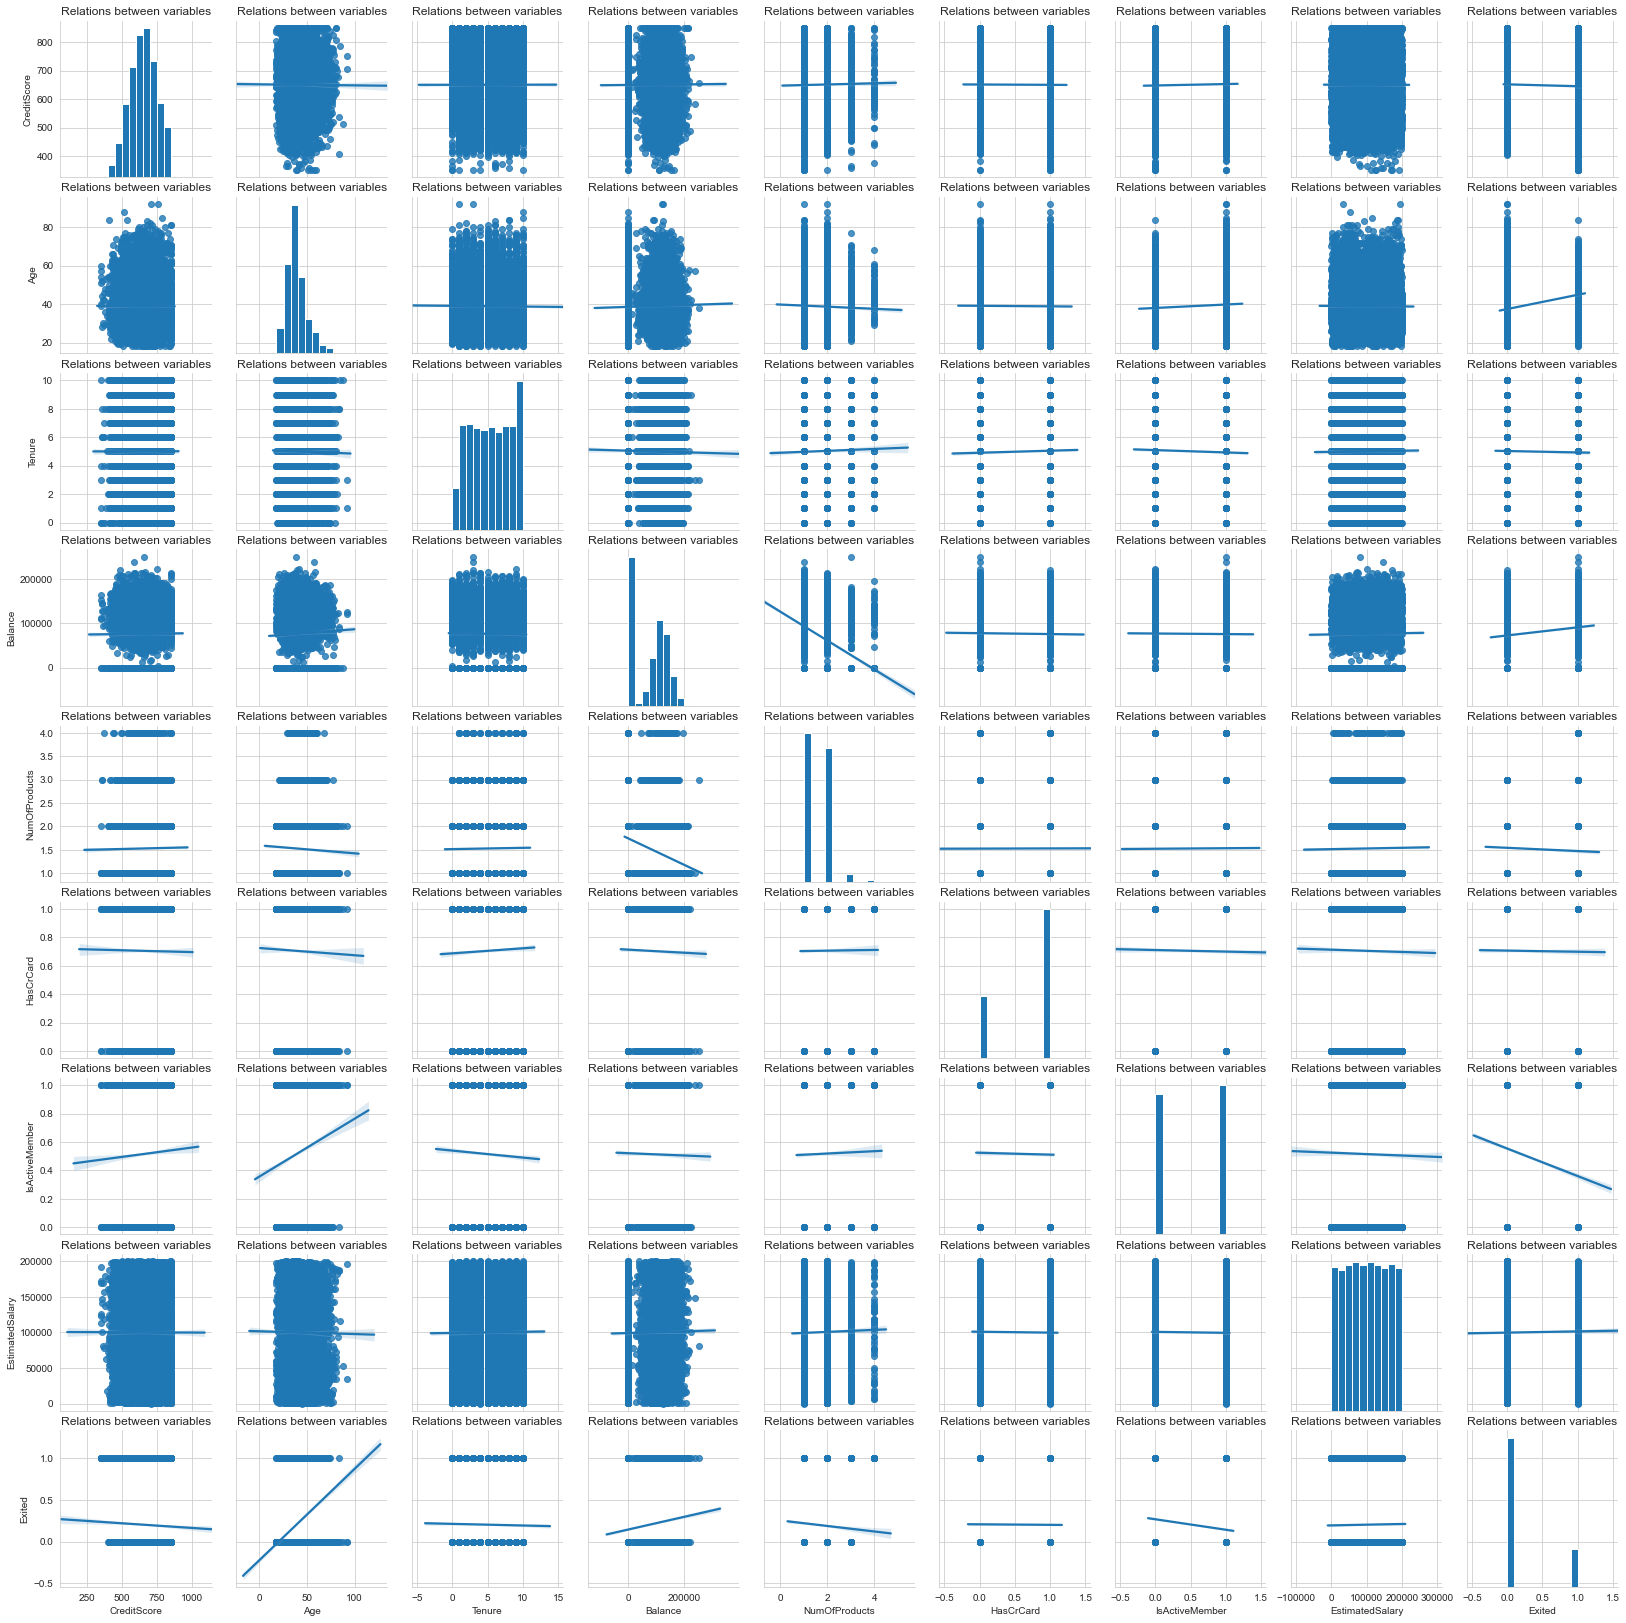

In [15]:
sns.pairplot(data = df.drop(['RowNumber','CustomerId','Surname'] , axis = 1) , kind = 'reg' ).set(title = 'Relations between variables');

In [16]:
df.corr(method = 'pearson')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


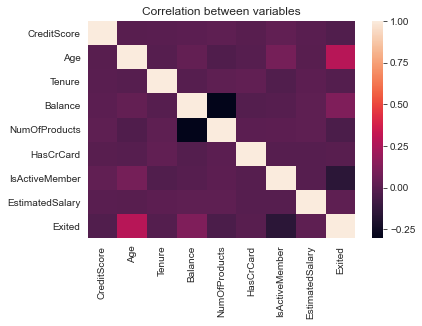

In [17]:
sns.heatmap(data = df.drop(['RowNumber','CustomerId','Surname'] , axis = 1).corr()).set(title = 'Correlation between variables') ;

In [18]:
df.drop(['RowNumber','CustomerId','Surname'] ,inplace=True,axis=1)


In [19]:
df.sample(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9351,718,Germany,Male,63,7,123204.88,1,1,1,100538.80,0
1730,850,France,Male,20,7,0.00,2,1,0,31288.77,0
7397,572,Germany,Male,47,4,99353.42,1,1,0,196549.85,1
4894,585,France,Female,32,8,144705.87,2,0,0,171482.56,0
5035,657,Spain,Male,34,5,154983.98,1,1,0,27738.01,0
8541,647,Spain,Male,47,5,105603.21,2,1,1,157360.90,0


In [20]:
df.shape

(10000, 11)

In [21]:
x=df.iloc[:,:10]

In [22]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('Geography',OneHotEncoder(),[1])],remainder='passthrough')

In [24]:
x=ct.fit_transform(x)
x1=df.iloc[:,0:]
x2=pd.get_dummies(data=x1)

In [25]:
y=df.Exited

In [26]:
x2.drop(['Exited'],inplace=True,axis=1)

In [27]:
x2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=0)

 NB : recherche sur KNN 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [31]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
y_predict_KNN=KNN.predict(X_test)

In [32]:
y_predict_KNN

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
confusion_matrix(y_test,y_predict_KNN)

array([[1483,  112],
       [ 359,   46]], dtype=int64)